In [ ]:
import pandas as pd
from google.colab import drive
import matplotlib.pyplot as plt
drive.mount('/content/drive')

dataset_path = '/content/drive/MyDrive/DataMan_Songs/Dataset/'

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
a = pd.read_csv(dataset_path + '1_Df_Errors.csv')

## Features Completeness 

In [ ]:
## Completezza
import ast
df = pd.read_csv(dataset_path + '4_DatasetFinal_Plus_MusicalMetrics.csv')
df['Instruments_Difficulty'] = df['Instruments_Difficulty'].apply(lambda x: ast.literal_eval(x))

df.shape

list_comp = {}
for col in df.columns:  
  null = df[df[col].isnull()]
  if len(null) > 0:
    # print(len(null), col)
    list_comp[col] = len(null)

df_completeness = pd.DataFrame(data=list_comp, index=[0]).transpose()
df_completeness = df_completeness.rename(columns={0: 'Completeness'})
df_completeness

,Completeness
Guitarist,712
Singer,1261
Bassist,1261
Drummer,1261
Pianist,1261
Relevance_Drums,26
Relevance_Bass,21
Relevance_Piano,16


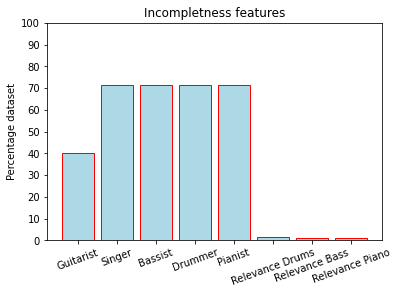

In [ ]:
df_completeness['Completeness(%)'] = round(df_completeness['Completeness'] / len(df) *100, 2) 
df_completeness

plt.bar(list(range(8)),df_completeness['Completeness(%)'], ec="red", color = "lightblue")
plt.xticks(list(range(8)), ['Guitarist', 'Singer', 'Bassist', 'Drummer',
                            'Pianist', 'Relevance Drums', 'Relevance Bass',
                            'Relevance Piano'],
       rotation=20)
plt.ylim(0,100)
plt.yticks([0,10,20,30,40,50,60,70,80,90,100])
plt.ylabel('Percentage dataset')
plt.style.use('seaborn-dark-palette')
plt.title('Incompletness features')
plt.savefig('Incompletness.png')

In [ ]:
## Completezza attributo Instrument_difficulty
n = 0
def empty_diff(x):
  global n
  for el in x:
    if (el == 'bass_nan') or (el == 'drums_nan') or (el == 'piano_nan') or (el == 'guitar_nan'): 
      n+=1
  return()# print('ok')
    
df['Instruments_Difficulty'].apply(lambda x: empty_diff(x))
print(len(df), n)


1763 0


In [ ]:
## Consitenza: la consistenza è stata trattata nel paragrafo 3 (quando si fa il merge, per quanto riguarda consistenza tra fonti)
## Consistenza di energy (song) con energy per strumento --> questultimo deve essere inferiore. Già in fase di costruzione della metrica tali valori sono posti come nulli 

# df.columns
## Consistency energy
strange_energyDrumns = df[df['energy'] < df['Energy_Mean_Drums_N']][['Band', 'Song', 'energy', 'Energy_Mean_Drums_N', 'Energy_Mean_Bass_N', 'Energy_Mean_Piano_N']]
strange_energyBass = df[df['energy'] < df['Energy_Mean_Bass_N']][['Band', 'Song', 'energy', 'Energy_Mean_Drums_N', 'Energy_Mean_Bass_N', 'Energy_Mean_Piano_N']]
strange_energyPiano = df[df['energy'] < df['Energy_Mean_Piano_N']][['Band', 'Song', 'energy', 'Energy_Mean_Drums_N', 'Energy_Mean_Bass_N', 'Energy_Mean_Piano_N']]
print(len(strange_energyDrumns), len(strange_energyBass), len(strange_energyPiano))

## Verifica il commento precedente
strange_DrBa = df[(df['energy'] < df['Energy_Mean_Drums_N']) & (df['energy'] < df['Energy_Mean_Bass_N'])]
strange_DrPi = df[(df['energy'] < df['Energy_Mean_Drums_N']) & (df['energy'] < df['Energy_Mean_Piano_N'])]
strange_BaPi = df[(df['energy'] < df['Energy_Mean_Bass_N']) & (df['energy'] < df['Energy_Mean_Piano_N'])]
print(len(strange_DrBa), len(strange_DrPi), len(strange_BaPi))


22 19 12
8 1 0


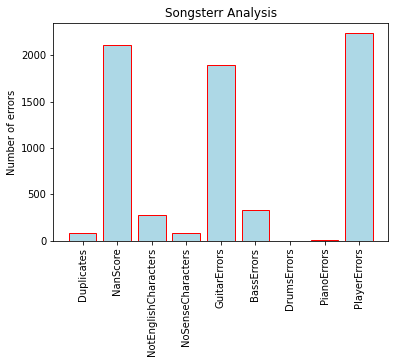

In [11]:
#Songsterr Analysis - Errors Plot
df = pd.read_csv('1_Df_Erros.csv')

plt.bar(list(range(9)),[78,2110,276,79,1896,332,0,6,2234], ec="red", color = "lightblue")
plt.xticks(list(range(9)), ['Duplicates', 'NanScore', 'NotEnglishCharacters', 'NoSenseCharacters',
                                 'GuitarErrors', 'BassErrors', 'DrumsErrors', 'PianoErrors', 'PlayerErrors'],
       rotation=90)
# plt.ylim(0,100)
# plt.yticks([0,10,20,30,40,50,60,70,80,90,100])
plt.ylabel('Number of errors')
# plt.style.use('seaborn-dark-palette')
plt.title('Songsterr Analysis')
plt.savefig('SongsterrAnalysis.png')